In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import functions

# mean monthly values: Tl default land cover, 3 different locations 

In [55]:
'''
%%time

column = 'Qdftl'
print(column)

result_df = pd.DataFrame()

# langtang
folder_path = '/Volumes/Extreme SSD/2024May_sedcas_modelruns/3mustangTL/default_land_cover'

# Iterate over the files in the folders
for folder_name in os.listdir(folder_path):
    # skip dsstore thing
    if folder_name == '.DS_Store':
        continue
    # skip all csvs
    if folder_name.endswith('.csv'):
        continue
    file_path = os.path.join(folder_path, folder_name, 'Sediment.out')
    if os.path.isfile(file_path):
        
        # calculate mean monthly value for given column 
        output_df = functions.calculate_monthly_sediment_yield(pd.read_csv(file_path))
        # take the column 
        name_column = output_df[column]
        # rename the columns 
        column_name = f'{column}_{folder_name}'
        result_df[column_name] = name_column
        result_df.columns = [col[-3:] for col in result_df.columns]


output_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/TL_default_landcover_output/'
result_df.to_csv(output_path + '3mustang_long_term_mean_monthly_Qdftl_default_landcover.csv', index = False)

# result_df.to_csv(folder_path + '/long_term_mean_monthly_Q100_default_landcover.csv', index = False)
'''






Qdftl


/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/ipykernel_launcher.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


CPU times: user 2min 30s, sys: 3.58 s, total: 2min 34s
Wall time: 2min 37s


# mean monthly values: SL default land cover, 3 different location 

\* the data and model runs are now stored on the external varya ssd

In [57]:
'''
%%time

column = 'dfs'
print(column)

result_df = pd.DataFrame()

# langtang
folder_path = '/Volumes/Extreme SSD/2024May_sedcas_modelruns/3mustangSL/default_land_cover_25percent'
# folder_path = '/Volumes/Extreme SSD/2024May_sedcas_modelruns/1langtangSL/default_land_cover/3default_land_cover_50percent'


# Iterate over the files in the folders
for folder_name in os.listdir(folder_path):
    # skip dsstore thing
    if folder_name == '.DS_Store':
        continue
    # skip all csvs
    if folder_name.endswith('.csv'):
        continue
    file_path = os.path.join(folder_path, folder_name, 'Sediment.out')
    if os.path.isfile(file_path):
        
        # calculate mean monthly value for given column 
        output_df = functions.calculate_monthly_sediment_yield(pd.read_csv(file_path))
        # take the column 
        name_column = output_df[column]
        # rename the columns 
        column_name = f'{column}_{folder_name}'
        result_df[column_name] = name_column
        result_df.columns = [col[-3:] for col in result_df.columns]


output_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/SL_default_landcover_output/'
result_df.to_csv(output_path + '3mustang_long_term_mean_monthly_Qdfs_25percent_default_landcover.csv', index = False)





'''


dfs


/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/ipykernel_launcher.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


CPU times: user 2min 17s, sys: 2.99 s, total: 2min 20s
Wall time: 2min 21s


In [58]:
# functions

# add elevation to the monthlymean data 

def add_elevation(elevation, df):
    # elevation = elevation.sort_values('band_data')
    elevation = elevation.transpose()
    elvlist = elevation.loc['cellnr2'].tolist()
    # order columns 
    df_ordered = df[elvlist]
    
    if elvlist == df_ordered.columns.tolist():
        print("columns: same")
    else:
        print("columns: not the same")
        
    # rename columns according to elevation
    df_ordered.columns = elevation.loc['band_data']
    
    return df_ordered

# make melted data and clean up

def prepare_for_monthly_boxplots(df):
    df['month'] = df.index+1
    df = df.drop('index', axis =1)
    melted = pd.melt(df, id_vars=['month'], var_name='elevation', value_name='Qdftl')

    # elevation bins
    melted['elevation_bin'] = melted.apply(functions.bin_elevation200, axis=1)
    melted = melted.sort_values('elevation_bin')
    # clean up - remove zeros
    # melted = melted[melted['Qdftl']!=0]
    return melted



def prepare_for_monthly_boxplots_SL(df):
    df['month'] = df.index+1
    df = df.drop('index', axis =1)
    melted = pd.melt(df, id_vars=['month'], var_name='elevation', value_name='dfs')

    # elevation bins
    melted['elevation_bin'] = melted.apply(functions.bin_elevation200, axis=1)
    melted = melted.sort_values('elevation_bin')
    # clean up - remove zeros
    # melted = melted[melted['dfs']!=0]
    return melted


# plots 

In [59]:
#read data 
output_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/TL_default_landcover_output/'

langtang_monthlymean = pd.read_csv(output_path + '1langtang_long_term_mean_monthly_Qdftl_default_landcover.csv')
bagrot_monthlymean = pd.read_csv(output_path + '2bagrot_long_term_mean_monthly_Qdftl_default_landcover.csv')
mustang_monthlymean =  pd.read_csv(output_path + '3mustang_long_term_mean_monthly_Qdftl_default_landcover.csv')



In [60]:

# read_elevation
langtang_elevation = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_langtang.csv')[['cellnr2','band_data']] 
bagrot_elevation = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_bagrot.csv')[['cellnr2','band_data']] 
mustang_elevation = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_mustang.csv')[['cellnr2','band_data']] 
# 

# ----- TL add elevation as column names
langtang_monthlymean_df = add_elevation(langtang_elevation, langtang_monthlymean).reset_index()
bagrot_monthlymean_df = add_elevation(bagrot_elevation, bagrot_monthlymean).reset_index()
mustang_monthlymean_df = add_elevation(mustang_elevation, mustang_monthlymean).reset_index()



columns: same
columns: same
columns: same


In [61]:

# make the data look the way you want it to look 
langtang_melted = prepare_for_monthly_boxplots(langtang_monthlymean_df)
bagrot_melted = prepare_for_monthly_boxplots(bagrot_monthlymean_df)
mustang_melted = prepare_for_monthly_boxplots(mustang_monthlymean_df)

# add region name 
langtang_melted['region'] = 'langtang'
bagrot_melted['region'] = 'bagrot'
mustang_melted['region'] = 'mustang'

In [62]:
# plt.figure(figsize=(25, 8))
# sns.boxplot(x='elevation', y='Qdftl', data=langtang_melted)

# plt.xticks(rotation=45)
# plt.show()

In [63]:
# plt.figure(figsize=(25, 8))
# sns.boxplot(x='elevation', y='Qdftl', data=bagrot_melted)

# plt.xticks(rotation=45)
# plt.show()

In [10]:
# plt.figure(figsize=(45, 10))
# sns.boxplot(x='elevation', y='Qdftl', data=mustang_melted)

# plt.xticks(rotation=45)
# plt.show()

In [11]:
# plt.figure(figsize=(25, 8))
# sns.boxplot(x='month', y='Qdftl', data=langtang_melted)

# plt.xticks(rotation=45)
# plt.show()

In [12]:
# plt.figure(figsize=(25, 8))
# sns.boxplot(x='month', y='Qdftl', data=bagrot_melted)

# plt.xticks(rotation=45)
# plt.show()

In [13]:
# plt.figure(figsize=(25, 8))
# sns.boxplot(x='month', y='Qdftl', data=mustang_melted)

# plt.xticks(rotation=45)
# plt.show()

In [14]:
# plt.figure(figsize=(25, 8))
# sns.boxplot(x='elevation_bin', y='Qdftl', data=langtang_melted)

# plt.xticks(rotation=45)
# plt.show()

In [15]:
# plt.figure(figsize=(25, 8))
# sns.boxplot(x='elevation_bin', y='Qdftl', data=bagrot_melted)

# plt.xticks(rotation=45)
# plt.show()

In [65]:
# plt.figure(figsize=(25, 8))
# sns.boxplot(x='elevation_bin', y='Qdftl', data=mustang_melted)

# plt.xticks(rotation=45)
# plt.show()

## side by side

In [66]:



combined = langtang_melted.append(bagrot_melted, ignore_index = True)
combined = combined.append(mustang_melted, ignore_index = True)

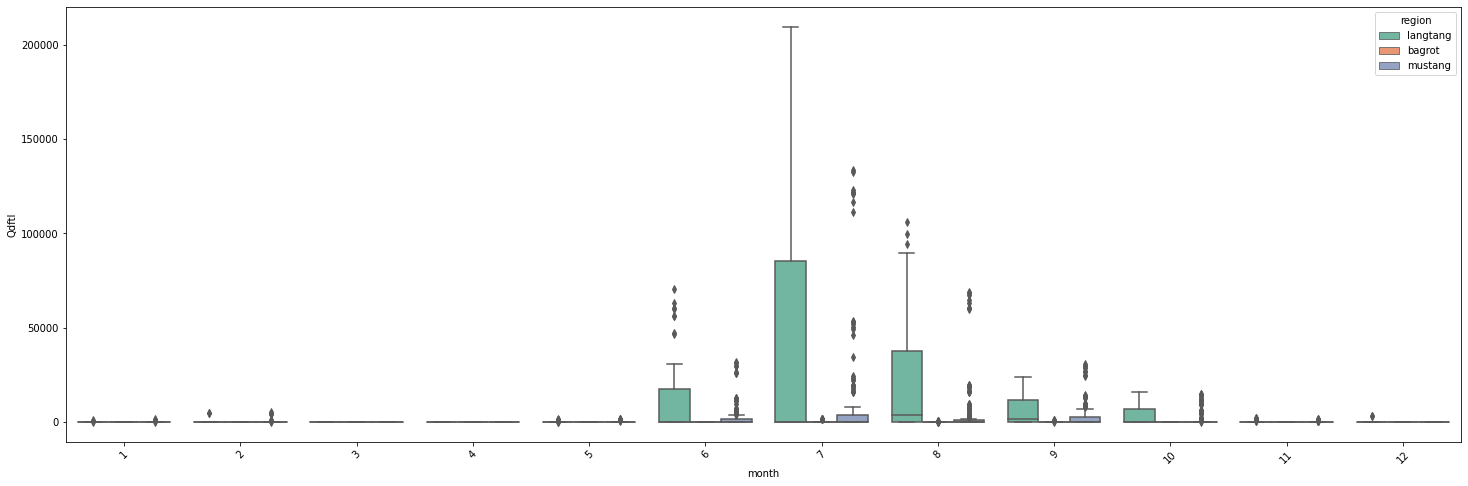

In [67]:
plt.figure(figsize=(25, 8))
sns.boxplot(x='month', y='Qdftl', hue = 'region', data=combined, palette = 'Set2')

plt.xticks(rotation=45)
plt.show()

In [30]:
# plt.figure(figsize=(25, 8))
# sns.boxplot(x='month', y='Qdftl', hue = 'elevation_bin', data=langtang_melted, palette = 'magma_r')

# plt.xticks(rotation=45)
# plt.show()

# plot SL with default land cover 

In [68]:
# read data 

#read data 
output_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/SL_default_landcover_output/'
# SL 25
langtang_monthlymean_SL25 = pd.read_csv(output_path + '1langtang_long_term_mean_monthly_Qdfs_25percent_default_landcover.csv')
bagrot_monthlymean_SL25 = pd.read_csv(output_path + '2bagrot_long_term_mean_monthly_Qdfs_25percent_default_landcover.csv')
mustang_monthlymean_SL25 =  pd.read_csv(output_path + '3mustang_long_term_mean_monthly_Qdfs_25percent_default_landcover.csv')

# SL 50
langtang_monthlymean_SL50 = pd.read_csv(output_path + '1langtang_long_term_mean_monthly_Qdfs_50percent_default_landcover.csv')
bagrot_monthlymean_SL50 = pd.read_csv(output_path + '2bagrot_long_term_mean_monthly_Qdfs_50percent_default_landcover.csv')
mustang_monthlymean_SL50 =  pd.read_csv(output_path + '3mustang_long_term_mean_monthly_Qdfs_50percent_default_landcover.csv')


# add elevation 

# sl 25
langtang_monthlymean_SL25 = add_elevation(langtang_elevation, langtang_monthlymean_SL25).reset_index()
bagrot_monthlymean_SL25 = add_elevation(bagrot_elevation, bagrot_monthlymean_SL25).reset_index()
mustang_monthlymean_SL25 = add_elevation(mustang_elevation, mustang_monthlymean_SL25).reset_index()

# sl 50
langtang_monthlymean_SL50 = add_elevation(langtang_elevation, langtang_monthlymean_SL50).reset_index()
bagrot_monthlymean_SL50 = add_elevation(bagrot_elevation, bagrot_monthlymean_SL50).reset_index()
mustang_monthlymean_SL50 = add_elevation(mustang_elevation, mustang_monthlymean_SL50).reset_index()



columns: same
columns: same
columns: same
columns: same
columns: same
columns: same


In [69]:
# clean up 

# make the data look the way you want it to look -- SL 25
langtang_melted_SL25= prepare_for_monthly_boxplots_SL(langtang_monthlymean_SL25)
bagrot_melted_SL25 = prepare_for_monthly_boxplots_SL(bagrot_monthlymean_SL25)
mustang_melted_SL25 = prepare_for_monthly_boxplots_SL(mustang_monthlymean_SL25)

# make the data look the way you want it to look -- SL 50
langtang_melted_SL50= prepare_for_monthly_boxplots_SL(langtang_monthlymean_SL50)
bagrot_melted_SL50 = prepare_for_monthly_boxplots_SL(bagrot_monthlymean_SL50)
mustang_melted_SL50 = prepare_for_monthly_boxplots_SL(mustang_monthlymean_SL50)


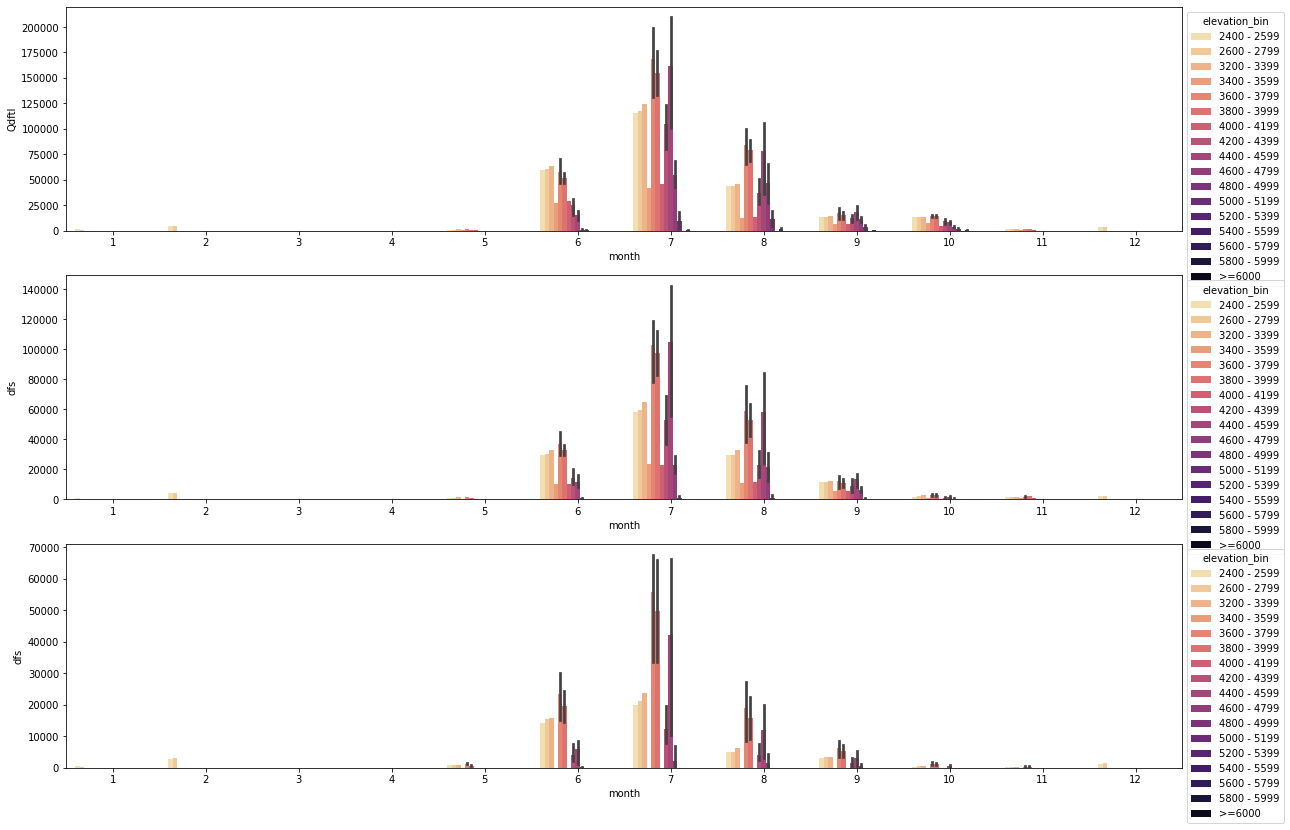

In [70]:
fig = plt.figure(figsize=(20, 14))
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ''')


sns.barplot(ax = mosaic['a'], x='month', y='Qdftl', hue = 'elevation_bin', data=langtang_melted,      palette = 'magma_r')
sns.barplot(ax = mosaic['b'], x='month', y='dfs',   hue = 'elevation_bin', data=langtang_melted_SL50, palette = 'magma_r')
sns.barplot(ax = mosaic['c'], x='month', y='dfs',   hue = 'elevation_bin', data=langtang_melted_SL25, palette = 'magma_r')

sns.move_legend(mosaic['a'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['b'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['c'], "upper left", bbox_to_anchor=(1, 1))



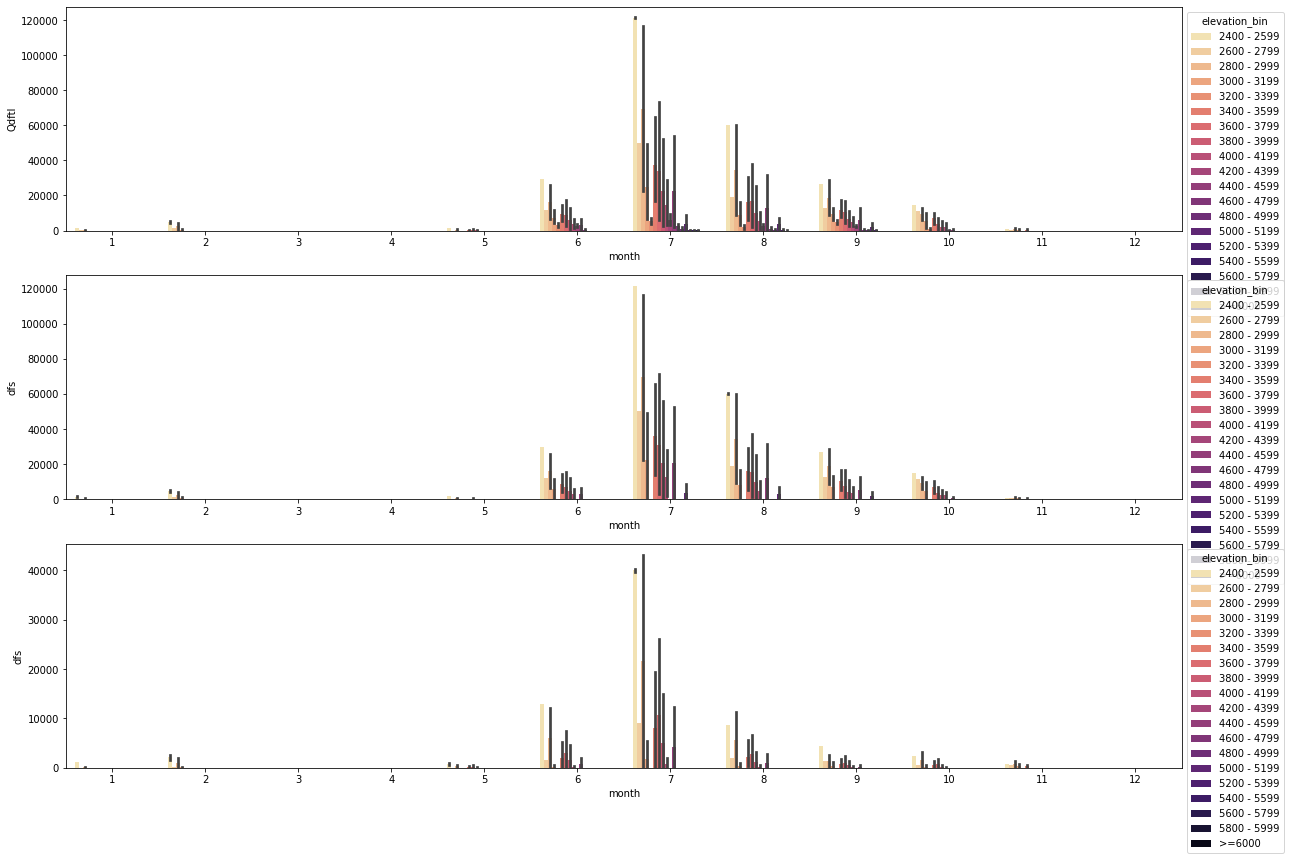

In [72]:
fig = plt.figure(figsize=(20, 14))
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ''')


sns.barplot(ax = mosaic['a'], x='month', y='Qdftl', hue = 'elevation_bin', data=mustang_melted,      palette = 'magma_r')
sns.barplot(ax = mosaic['b'], x='month', y='dfs',   hue = 'elevation_bin', data=mustang_melted_SL50, palette = 'magma_r')
sns.barplot(ax = mosaic['c'], x='month', y='dfs',   hue = 'elevation_bin', data=mustang_melted_SL25, palette = 'magma_r')

sns.move_legend(mosaic['a'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['b'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['c'], "upper left", bbox_to_anchor=(1, 1))



# TL and SL debris flow count, default land cover 

In [118]:
# read data 

#read data 
output_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/TL_default_landcover_output/'

langtang_monthlymean_count = pd.read_csv(output_path + '1langtang_mean_monthly_TL_dfcount_default_landcover.csv')
bagrot_monthlymean_count = pd.read_csv(output_path + '2bagrot_mean_monthly_TL_dfcount_default_landcover.csv')
mustang_monthlymean_count =  pd.read_csv(output_path + '3mustang_mean_monthly_TL_dfcount_default_landcover.csv')

output_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/SL_default_landcover_output/'

langtang_count_SL25 = pd.read_csv(output_path + '1langtang_mean_monthly_SL_dfcount_25percent_default_landcover.csv')
langtang_count_SL50 = pd.read_csv(output_path + '1langtang_mean_monthly_SL_dfcount_50percent_default_landcover.csv')
# bagrot_count_SL25   = pd.read_csv(output_path + '2bagrot_mean_monthly_SL_dfcount_25percent_default_landcover.csv')
# bagrot_count_SL50   = pd.read_csv(output_path + '2bagrot_mean_monthly_SL_dfcount_50percent_default_landcover.csv')
mustang_count_SL25 = pd.read_csv(output_path + '3mustang_mean_monthly_SL_dfcount_25percent_default_landcover.csv')
mustang_count_SL50 = pd.read_csv(output_path + '3mustang_mean_monthly_SL_dfcount_50percent_default_landcover.csv')

# # add elevation 
# # TL
langtang_monthlymean_count = add_elevation(langtang_elevation, langtang_monthlymean_count).reset_index()
# bagrot_monthlymean_count = add_elevation(bagrot_elevation, bagrot_monthlymean_count).reset_index()
mustang_monthlymean_count = add_elevation(mustang_elevation, mustang_monthlymean_count).reset_index()

# # # SL
langtang_count_SL25 = add_elevation(langtang_elevation, langtang_count_SL25).reset_index()
langtang_count_SL50 = add_elevation(langtang_elevation, langtang_count_SL50).reset_index()
# # bagrot_count_SL25   = add_elevation(bagrot_elevation, bagrot_count_SL25).reset_index()
# # bagrot_count_SL50   = add_elevation(bagrot_elevation, bagrot_count_SL50).reset_index()

mustang_count_SL25 = add_elevation(mustang_elevation, mustang_count_SL25).reset_index()
mustang_count_SL50 = add_elevation(mustang_elevation, mustang_count_SL50).reset_index()


# # # clean up 

# # make the data look the way you want it to look -- SL 25
langtang_count_melt= prepare_for_monthly_boxplots_SL(langtang_monthlymean_count)
# bagrot_count_melt = prepare_for_monthly_boxplots_SL(bagrot_monthlymean_count)
mustang_count_melt= prepare_for_monthly_boxplots_SL(mustang_monthlymean_count)

langtang_count_SL25_melt= prepare_for_monthly_boxplots_SL(langtang_count_SL25)
langtang_count_SL50_melt= prepare_for_monthly_boxplots_SL(langtang_count_SL50)
# # bagrot_count_SL25_melt= prepare_for_monthly_boxplots_SL(bagrot_count_SL25)
# # bagrot_count_SL50_melt= prepare_for_monthly_boxplots_SL(bagrot_count_SL25)


mustang_count_SL25_melt= prepare_for_monthly_boxplots_SL(mustang_count_SL25)
mustang_count_SL50_melt= prepare_for_monthly_boxplots_SL(mustang_count_SL50)


columns: same
columns: same
columns: same
columns: same
columns: same
columns: same


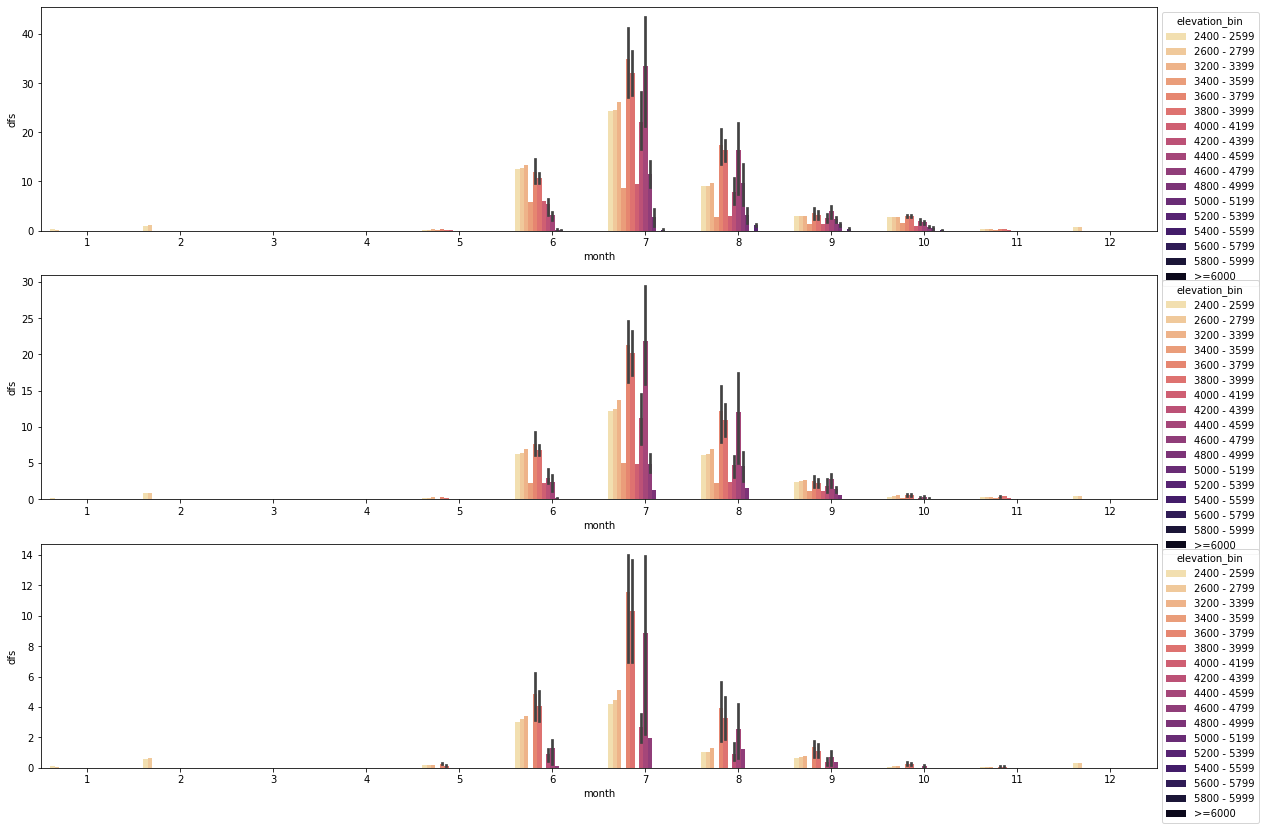

In [119]:
fig = plt.figure(figsize=(20, 14))
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ''')

sns.barplot(ax = mosaic['a'], x='month', y='dfs',   hue = 'elevation_bin', data=langtang_count_melt,      palette = 'magma_r')
sns.barplot(ax = mosaic['b'], x='month', y='dfs',   hue = 'elevation_bin', data=langtang_count_SL50_melt, palette = 'magma_r')
sns.barplot(ax = mosaic['c'], x='month', y='dfs',   hue = 'elevation_bin', data=langtang_count_SL25_melt, palette = 'magma_r')

sns.move_legend(mosaic['a'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['b'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['c'], "upper left", bbox_to_anchor=(1, 1))


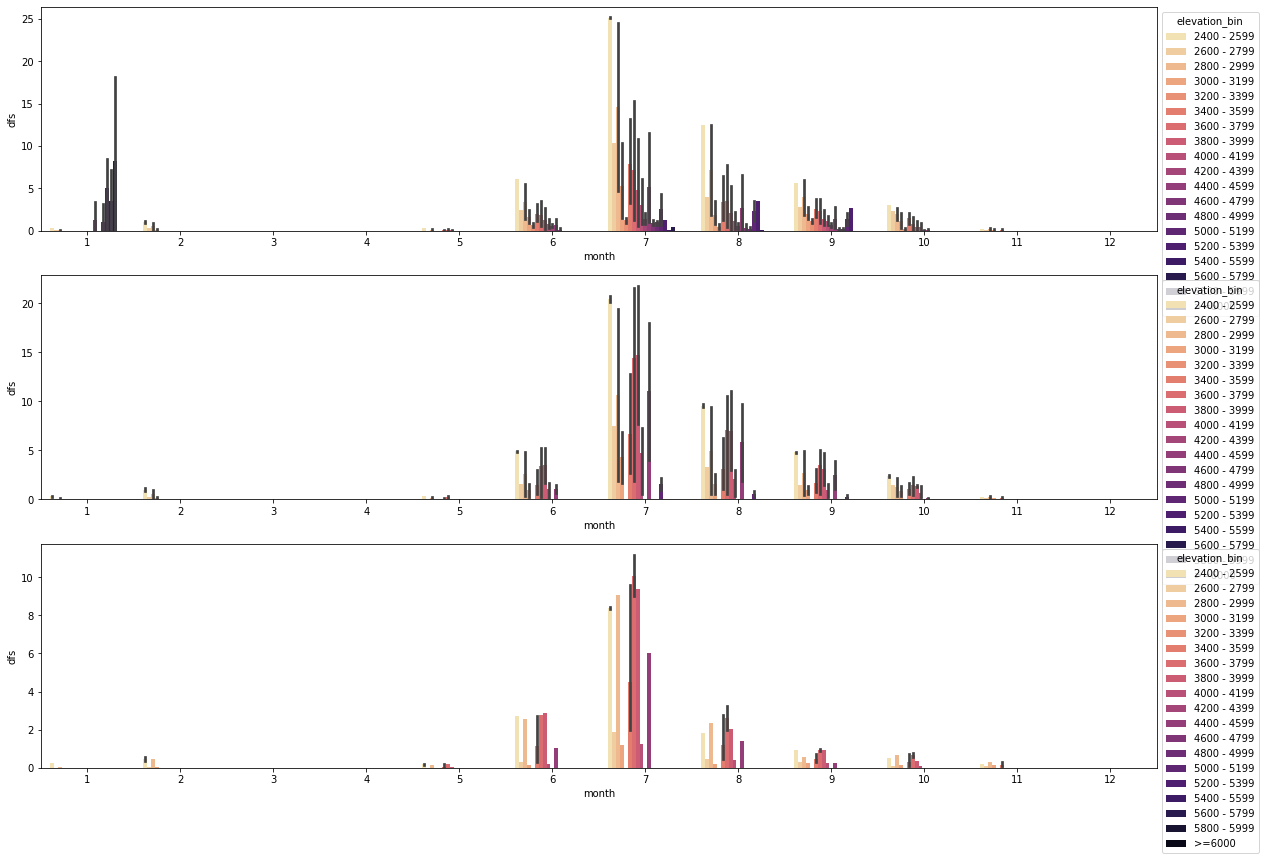

In [120]:
fig = plt.figure(figsize=(20, 14))
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ''')

sns.barplot(ax = mosaic['a'], x='month', y='dfs',   hue = 'elevation_bin', data=mustang_count_melt,      palette = 'magma_r')
sns.barplot(ax = mosaic['b'], x='month', y='dfs',   hue = 'elevation_bin', data=mustang_count_SL50_melt, palette = 'magma_r')
sns.barplot(ax = mosaic['c'], x='month', y='dfs',   hue = 'elevation_bin', data=mustang_count_SL25_melt, palette = 'magma_r')

sns.move_legend(mosaic['a'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['b'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['c'], "upper left", bbox_to_anchor=(1, 1))


# normalize data 

In [130]:
def calculate_percent(dfSL, TL):
    dfSL['df_percent'] = (dfSL.dfs * 100) / TL.Qdftl
    return dfSL

# values - langtang 
langtang_melted_SL50_norm = calculate_percent(langtang_melted_SL50, langtang_melted)
langtang_melted_SL25_norm = calculate_percent(langtang_melted_SL25, langtang_melted)

# values mustang
mustang_melted_SL50_norm = calculate_percent(mustang_melted_SL50, mustang_melted)
mustang_melted_SL25_norm = calculate_percent(mustang_melted_SL25, mustang_melted)



def calculate_percent_count(dfSL, TL):
    dfSL['df_count_percent'] = (dfSL.dfs * 100) / TL.dfs
    return dfSL



#  ---- count 

langtang_count_melt_SL50_norm = calculate_percent_count(langtang_count_SL50_melt, langtang_count_melt)
langtang_count_melt_SL25_norm = calculate_percent_count(langtang_count_SL25_melt, langtang_count_melt)

mustang_count_melt_SL50_norm = calculate_percent_count(mustang_count_SL50_melt, mustang_count_melt)
mustang_count_melt_SL25_norm = calculate_percent_count(mustang_count_SL25_melt, mustang_count_melt)


In [128]:
# langtang_count_melt


## normalized plot for df volumes per month 

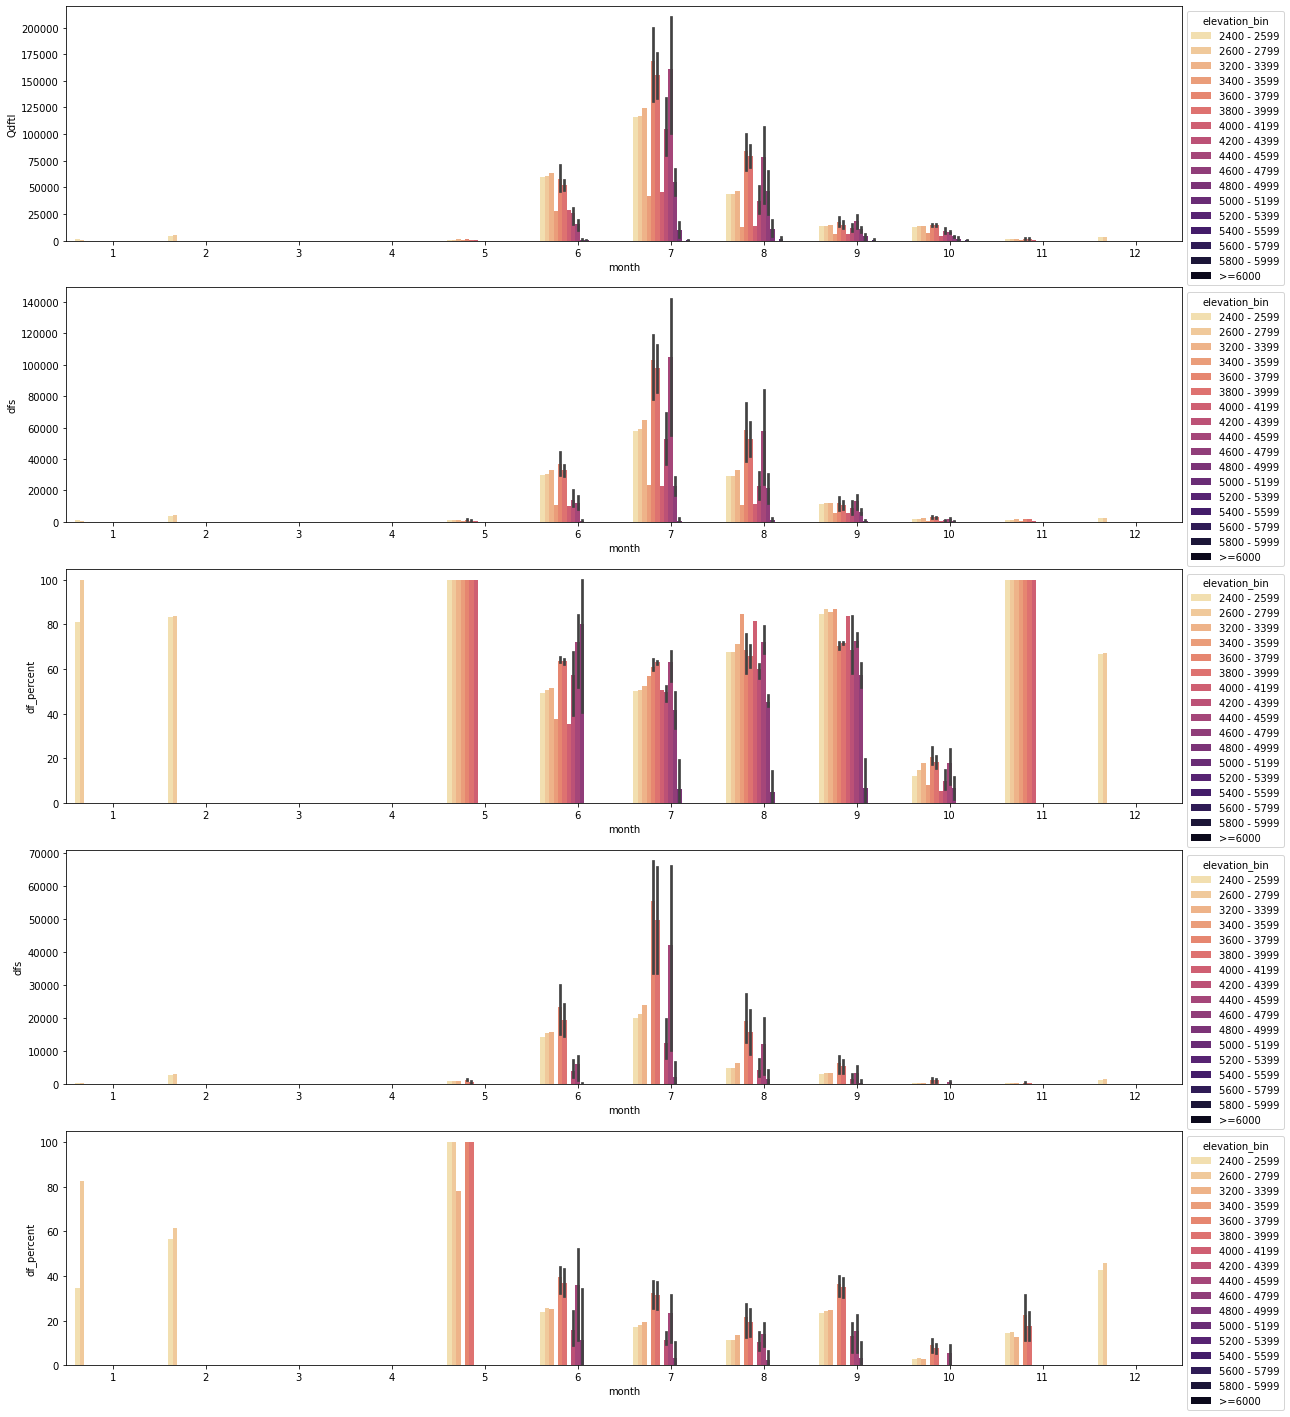

In [122]:
fig = plt.figure(figsize=(20, 25))
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            eee
                            ''')


sns.barplot(ax = mosaic['a'], x='month', y='Qdftl',        hue = 'elevation_bin', data=langtang_melted,           palette = 'magma_r')
sns.barplot(ax = mosaic['b'], x='month', y='dfs',          hue = 'elevation_bin', data=langtang_melted_SL50_norm, palette = 'magma_r')
sns.barplot(ax = mosaic['c'], x='month', y='df_percent',   hue = 'elevation_bin', data=langtang_melted_SL50_norm, palette = 'magma_r')
sns.barplot(ax = mosaic['d'], x='month', y='dfs',          hue = 'elevation_bin', data=langtang_melted_SL25_norm, palette = 'magma_r')
sns.barplot(ax = mosaic['e'], x='month', y='df_percent',   hue = 'elevation_bin', data=langtang_melted_SL25_norm, palette = 'magma_r')


sns.move_legend(mosaic['a'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['b'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['c'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['d'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['e'], "upper left", bbox_to_anchor=(1, 1))

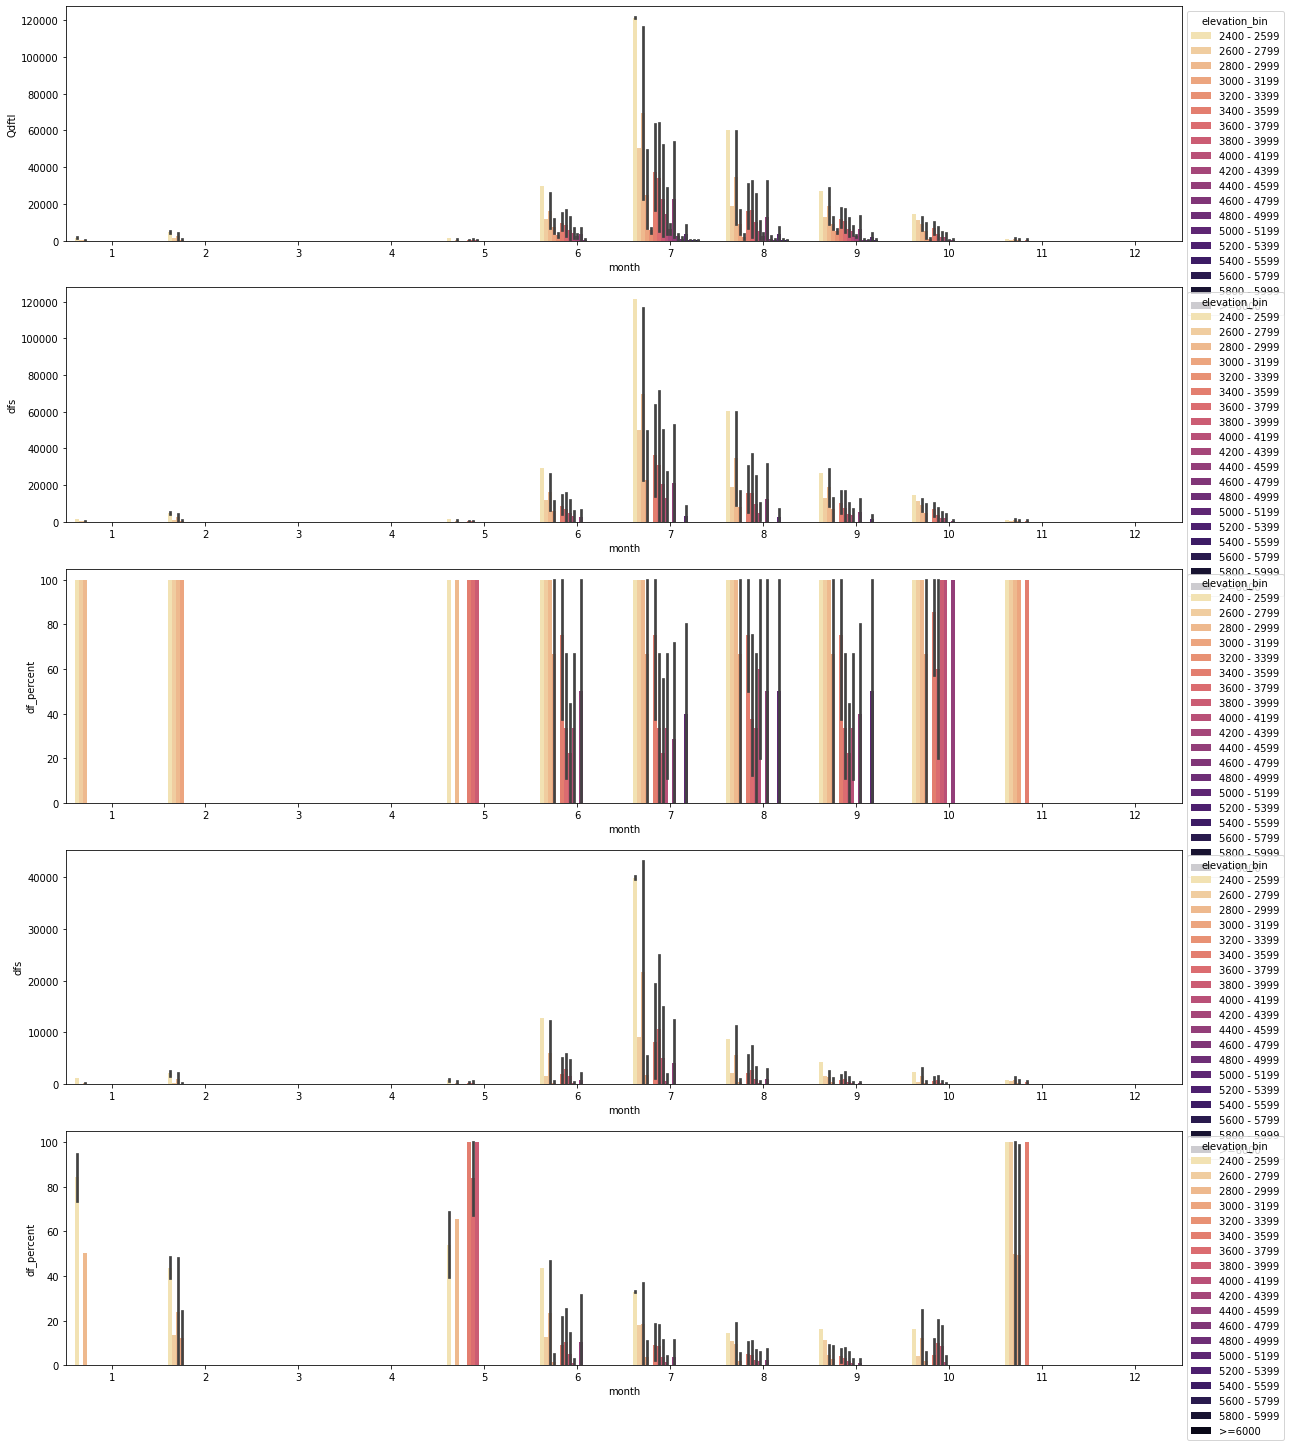

In [123]:
fig = plt.figure(figsize=(20, 25))
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            eee
                            ''')


sns.barplot(ax = mosaic['a'], x='month', y='Qdftl',        hue = 'elevation_bin', data=mustang_melted,           palette = 'magma_r')
sns.barplot(ax = mosaic['b'], x='month', y='dfs',          hue = 'elevation_bin', data=mustang_melted_SL50_norm, palette = 'magma_r')
sns.barplot(ax = mosaic['c'], x='month', y='df_percent',   hue = 'elevation_bin', data=mustang_melted_SL50_norm, palette = 'magma_r')
sns.barplot(ax = mosaic['d'], x='month', y='dfs',          hue = 'elevation_bin', data=mustang_melted_SL25_norm, palette = 'magma_r')
sns.barplot(ax = mosaic['e'], x='month', y='df_percent',   hue = 'elevation_bin', data=mustang_melted_SL25_norm, palette = 'magma_r')


sns.move_legend(mosaic['a'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['b'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['c'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['d'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['e'], "upper left", bbox_to_anchor=(1, 1))





# normalized plots for count of dfs per month 

In [133]:

langtang_count_melt_SL50_norm = calculate_percent_count(langtang_count_SL50_melt, langtang_count_melt)
langtang_count_melt_SL25_norm = calculate_percent_count(langtang_count_SL25_melt, langtang_count_melt)

mustang_count_melt_SL50_norm = calculate_percent_count(mustang_count_SL50_melt, mustang_count_melt)
mustang_count_melt_SL25_norm = calculate_percent_count(mustang_count_SL25_melt, mustang_count_melt)


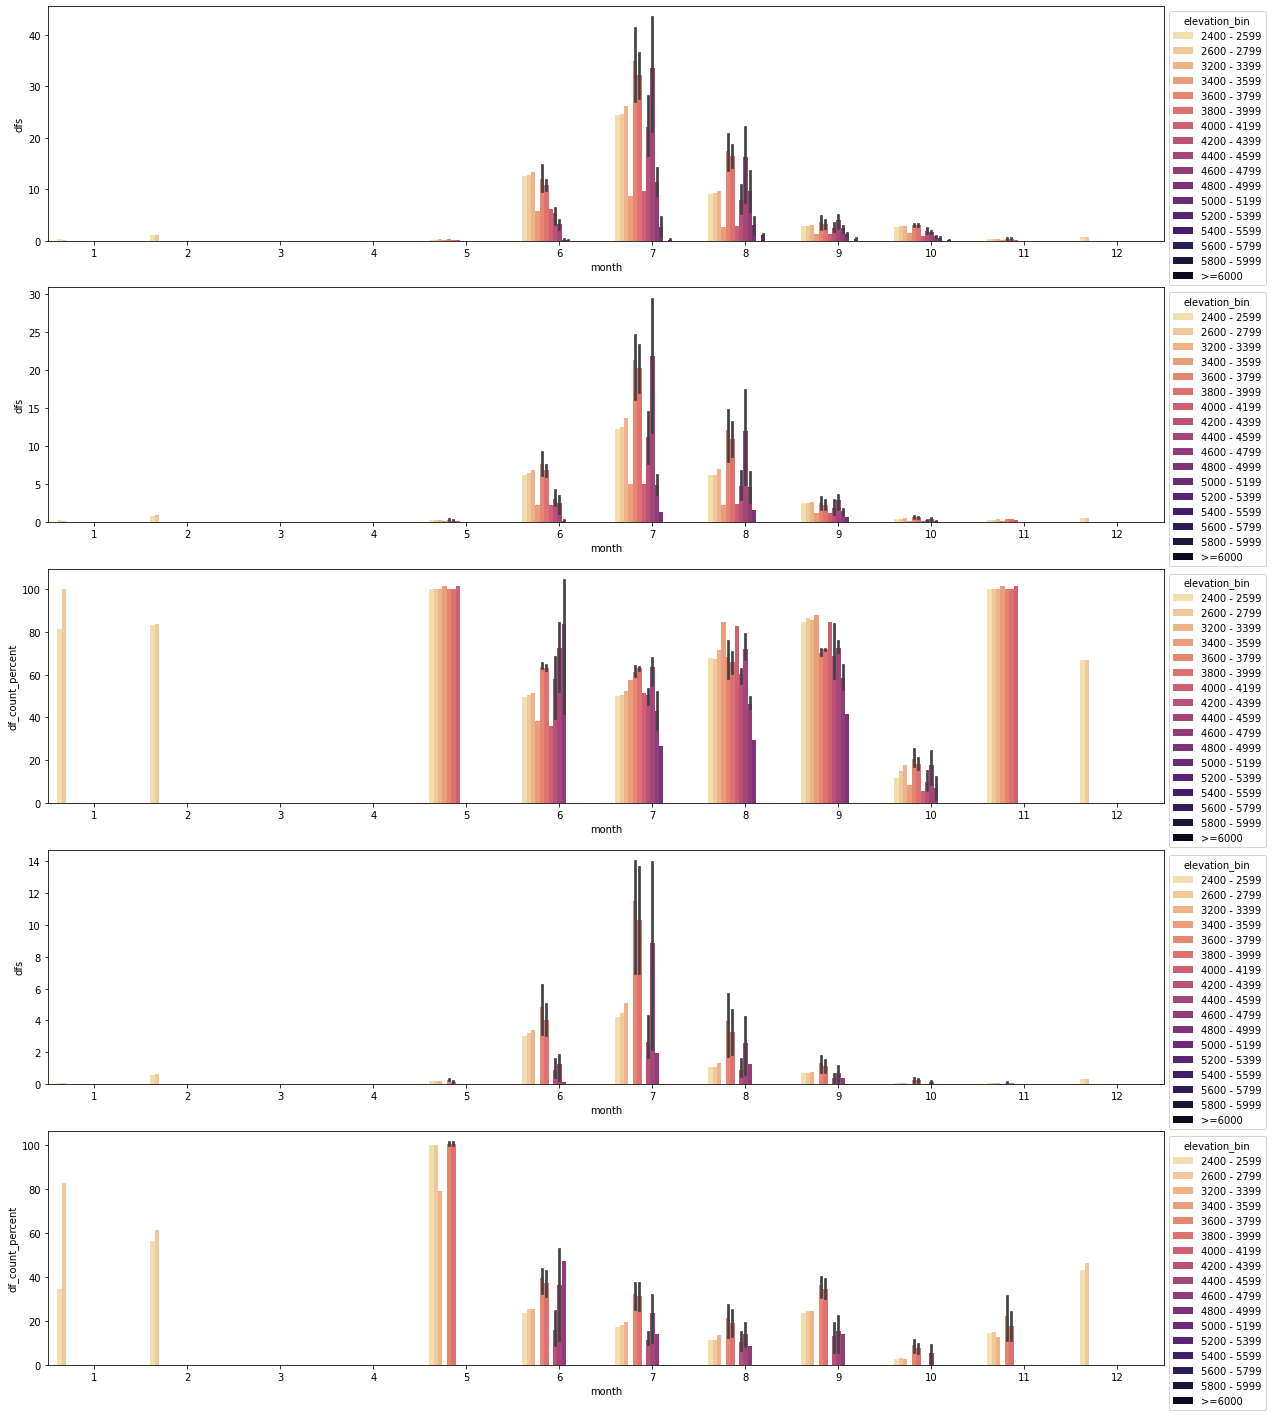

In [134]:
fig = plt.figure(figsize=(20, 25))
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            eee
                            ''')


sns.barplot(ax = mosaic['a'], x='month', y='dfs',        hue = 'elevation_bin', data=langtang_count_melt,           palette = 'magma_r')
sns.barplot(ax = mosaic['b'], x='month', y='dfs',          hue = 'elevation_bin', data=langtang_count_melt_SL50_norm, palette = 'magma_r')
sns.barplot(ax = mosaic['c'], x='month', y='df_count_percent',   hue = 'elevation_bin', data=langtang_count_melt_SL50_norm, palette = 'magma_r')
sns.barplot(ax = mosaic['d'], x='month', y='dfs',          hue = 'elevation_bin', data=langtang_count_melt_SL25_norm, palette = 'magma_r')
sns.barplot(ax = mosaic['e'], x='month', y='df_count_percent',   hue = 'elevation_bin', data=langtang_count_melt_SL25_norm, palette = 'magma_r')


sns.move_legend(mosaic['a'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['b'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['c'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['d'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['e'], "upper left", bbox_to_anchor=(1, 1))



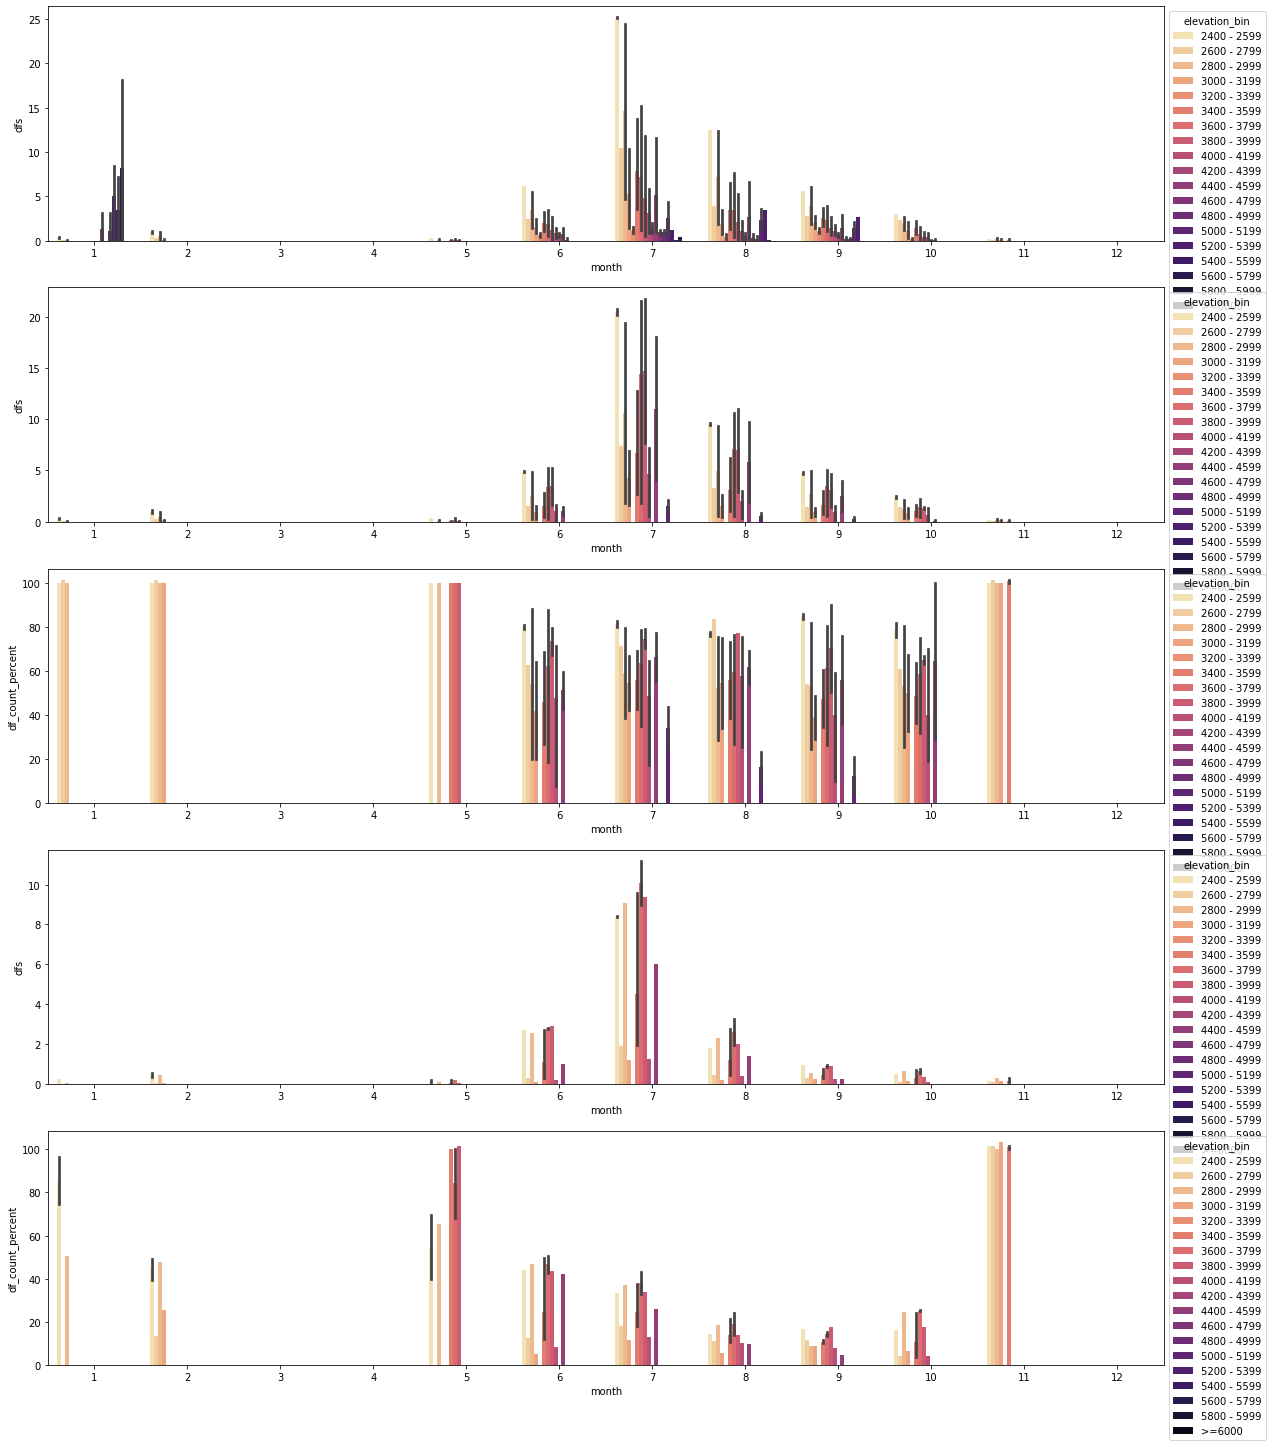

In [140]:
fig = plt.figure(figsize=(20, 25))
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            eee
                            ''')


sns.barplot(ax = mosaic['a'], x='month', y='dfs',              hue = 'elevation_bin', data=mustang_count_melt,           palette = 'magma_r')
sns.barplot(ax = mosaic['b'], x='month', y='dfs',              hue = 'elevation_bin', data=mustang_count_melt_SL50_norm, palette = 'magma_r')
sns.barplot(ax = mosaic['c'], x='month', y='df_count_percent', hue = 'elevation_bin', data=mustang_count_melt_SL50_norm, palette = 'magma_r')
sns.barplot(ax = mosaic['d'], x='month', y='dfs',          hue = 'elevation_bin', data=mustang_count_melt_SL25_norm, palette = 'magma_r')
sns.barplot(ax = mosaic['e'], x='month', y='df_count_percent', hue = 'elevation_bin', data=mustang_count_melt_SL25_norm, palette = 'magma_r')
# sns.boxplot(ax = mosaic['e'], x='month', y='df_count_percent', hue = 'elevation_bin', data=mustang_count_melt_SL25_norm, palette = 'magma_r')


sns.move_legend(mosaic['a'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['b'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['c'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['d'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['e'], "upper left", bbox_to_anchor=(1, 1))



# values for each month, TL, default land cover, 3 locations 

In [29]:
# result_df